# Ghouls, Goblins, and Ghosts... Boo!

In [1]:
import tensorflow as tf
import pynvml
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Check if TensorFlow is using the GPU
if tf.test.is_gpu_available():
    print("TensorFlow is using the GPU")
    
    # Initialize the pynvml library
    pynvml.nvmlInit()
    
    # Get the number of GPU devices
    num_gpus = pynvml.nvmlDeviceGetCount()
    
    # Iterate over GPU devices
    for i in range(num_gpus):
        # Get the device identifier
        handle = pynvml.nvmlDeviceGetHandleByIndex(i)
        # Get the full GPU name
        gpu_name = pynvml.nvmlDeviceGetName(handle)
        print("GPU Name:", gpu_name)
        
    # Shutdown the pynvml library
    pynvml.nvmlShutdown()
else:
    print("TensorFlow is not using the GPU")

TensorFlow is using the GPU
GPU Name: NVIDIA GeForce RTX 4060


In [2]:
!pip install numpy pandas seaborn matplotlib xgboost imblearn


In [3]:
import tensorflow as tf
import pynvml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import zipfile
import os


import warnings
warnings.filterwarnings("ignore")

In [4]:
# Função para carregar arquivos zipados
def carregar_dados(caminho, arquivo):
    with zipfile.ZipFile(os.path.join(caminho, arquivo), 'r') as z:
        with z.open(z.namelist()[0]) as f:
            return pd.read_csv(f)

# Definindo o caminho dos arquivos
data_path = "D:/Python/ML/2024_07_17 - Kaggle - Ghouls, Goblins, and Ghosts... Boo!/data"

# Carregando os dados
train = carregar_dados(data_path, 'train.csv.zip')
test = carregar_dados(data_path, 'test.csv.zip')


In [5]:
# Exibindo as primeiras linhas do conjunto de dados de treino
print("Dados de Treinamento:")
train.head()


Dados de Treinamento:


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [6]:
test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [7]:
# Análise exploratória dos dados
# Verificando informações gerais sobre o conjunto de dados
print("\nInformações dos Dados de Treinamento:")
train.info()



Informações dos Dados de Treinamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [8]:
# Verificando estatísticas descritivas
print("\nEstatísticas Descritivas:")
train.describe()



Estatísticas Descritivas:


,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [9]:
# Verificando a distribuição das classes
print("\nDistribuição das Classes:")
train['type'].value_counts()



Distribuição das Classes:


type
Ghoul     129
Goblin    125
Ghost     117
Name: count, dtype: int64

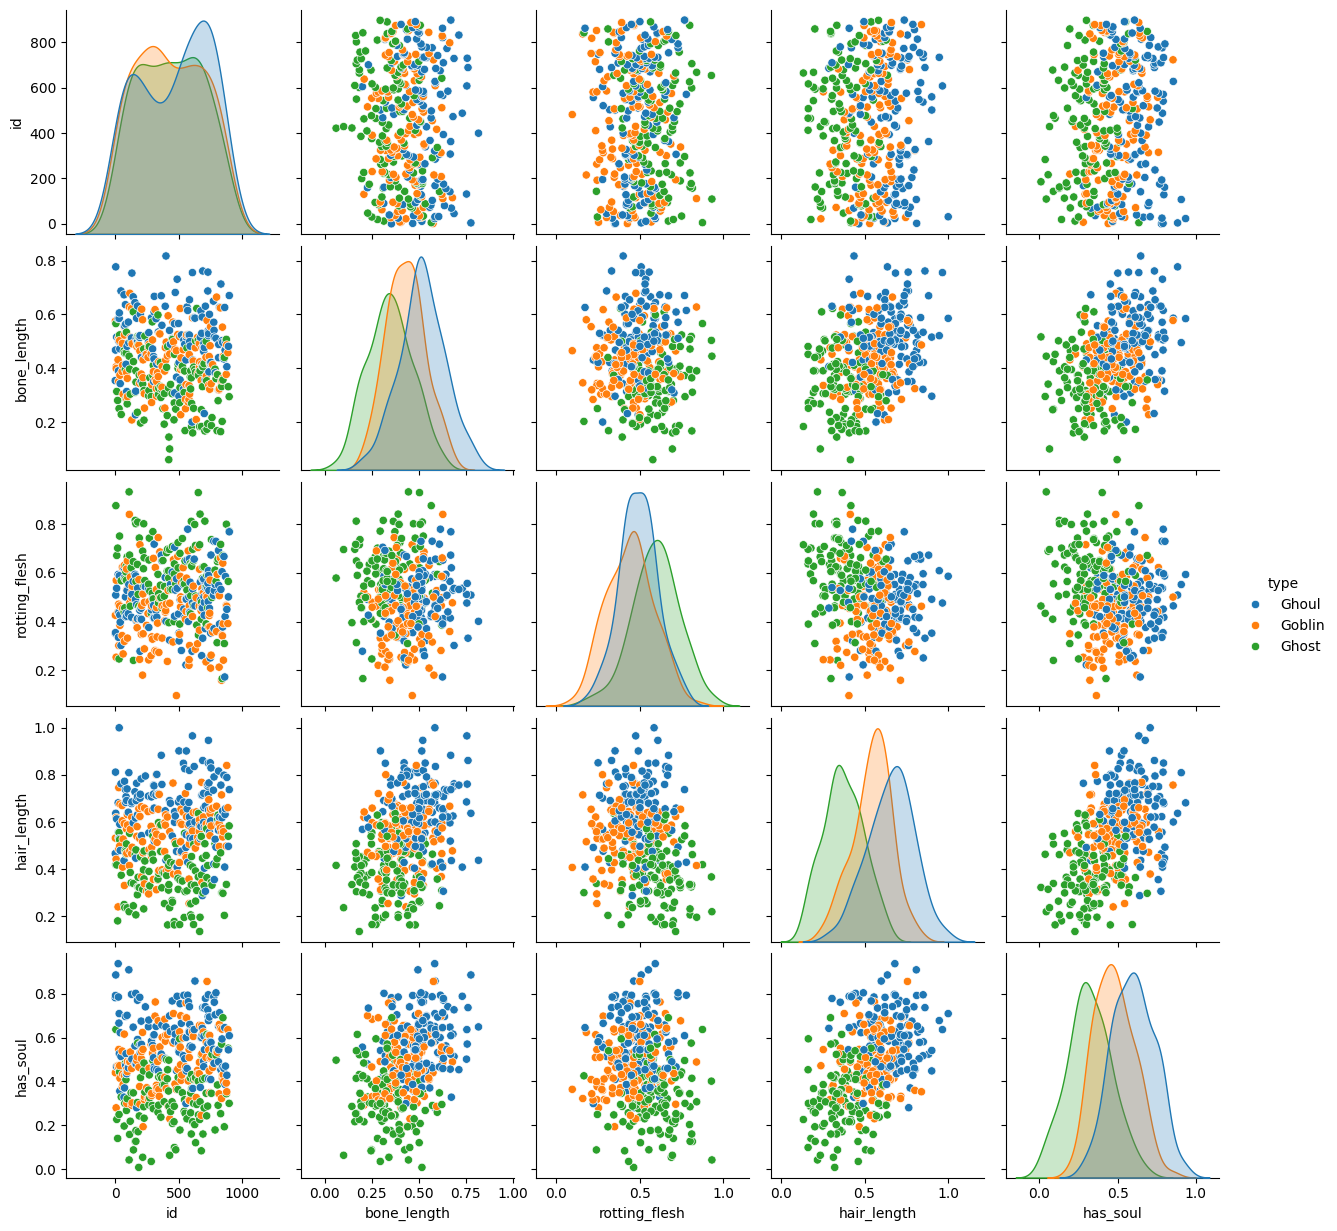

In [10]:
# Visualização da distribuição das características
sns.pairplot(train, hue='type')
plt.show()



Train - Quantidade de Casos por Color:
color
white    137
clear    120
green     42
black     41
blue      19
blood     12
Name: count, dtype: int64


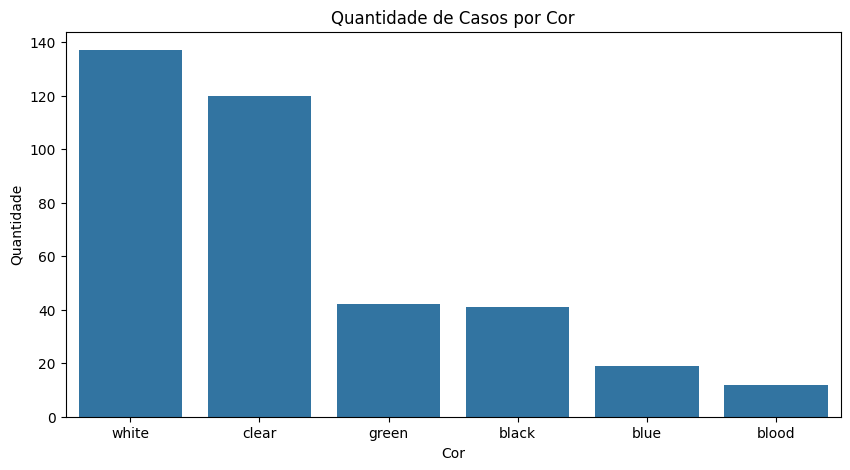

In [11]:
# Analisando a quantidade de casos por color
color_counts = train['color'].value_counts()
print("\nTrain - Quantidade de Casos por Color:")
print(color_counts)

plt.figure(figsize=(10, 5))
sns.countplot(x='color', data=train, order=color_counts.index)
plt.title('Quantidade de Casos por Cor')
plt.xlabel('Cor')
plt.ylabel('Quantidade')
plt.show()



Test - Quantidade de Casos por Color:
color
white    197
clear    172
black     63
green     53
blue      35
blood      9
Name: count, dtype: int64


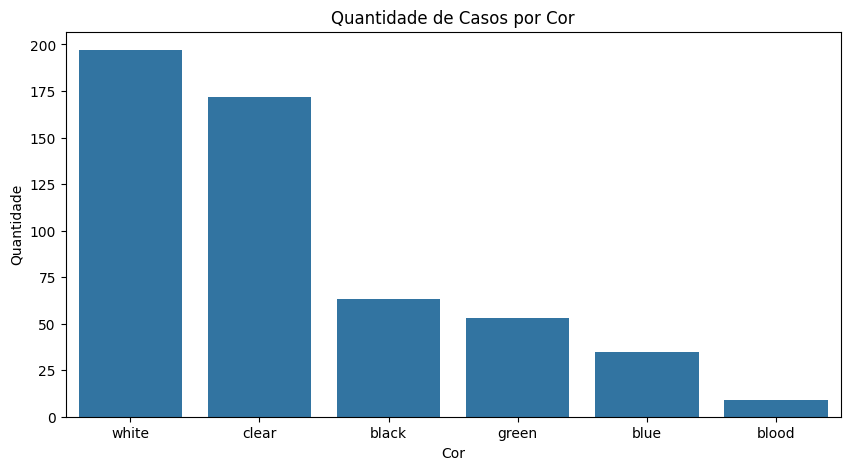

In [12]:
# Analisando a quantidade de casos por color
color_counts = test['color'].value_counts()
print("\nTest - Quantidade de Casos por Color:")
print(color_counts)

plt.figure(figsize=(10, 5))
sns.countplot(x='color', data=test, order=color_counts.index)
plt.title('Quantidade de Casos por Cor')
plt.xlabel('Cor')
plt.ylabel('Quantidade')
plt.show()


In [13]:
# Pré-processamento dos dados
# Convertendo a variável categórica 'color' em variáveis dummy
train = pd.get_dummies(train, columns=['color'])
test = pd.get_dummies(test, columns=['color'])



In [14]:
# Removendo a coluna 'id' e separando a variável alvo
X = train.drop(columns=['id', 'type'])
y = train['type']

# Codificando a variável alvo
le = LabelEncoder()
y = le.fit_transform(y)

# Padronizando as características
scaler = StandardScaler()
X = scaler.fit_transform(X)
test_id = test['id']
test = scaler.transform(test.drop(columns=['id']))

# Dividindo os dados em treino e validação de forma estratificada
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=99, stratify=y)


In [15]:
# Definindo parâmetros para GridSearchCV
param_grid = {
    "Random Forest": {"n_estimators": [100, 500, 1000]},
    "Gradient Boosting": {"n_estimators": [100, 500, 1000], "learning_rate": [0.01, 0.1, 0.5]},
    "AdaBoost": {"n_estimators": [50, 100, 500]},
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10, 100]},
    "SVC": {"C": [0.01, 0.1, 1, 10, 100], "kernel": ["linear", "rbf"]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 11, 19], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"]},
    "Decision Tree": {"max_depth": [None, 10, 20, 30], "min_samples_split": [2, 10, 20]},
    "Naive Bayes": {}
}

modelos = {
    "Random Forest": RandomForestClassifier(random_state=99),
    "Gradient Boosting": GradientBoostingClassifier(random_state=99),
    "AdaBoost": AdaBoostClassifier(random_state=99),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=99),
    "SVC": SVC(random_state=99),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=99),
    "Naive Bayes": GaussianNB(),
    "Extra Trees": ExtraTreesClassifier(random_state=99)
}

resultados = {}


In [16]:
for nome, modelo in modelos.items():
    print(f"Tuning {nome}...")
    grid_search = GridSearchCV(modelo, param_grid.get(nome, {}), cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    melhor_modelo = grid_search.best_estimator_
    pred = melhor_modelo.predict(X_val)
    acc = accuracy_score(y_val, pred)
    resultados[nome] = acc
    print(f"\nModelo: {nome}")
    print(f"Acurácia: {acc}")
    print("Relatório de Classificação:\n", classification_report(y_val, pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_val, pred))


Tuning Random Forest...

Modelo: Random Forest
Acurácia: 0.7321428571428571
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.74      0.79      0.77        39
           2       0.61      0.58      0.59        38

    accuracy                           0.73       112
   macro avg       0.73      0.73      0.73       112
weighted avg       0.73      0.73      0.73       112

Matriz de Confusão:
 [[29  0  6]
 [ 0 31  8]
 [ 5 11 22]]
Tuning Gradient Boosting...

Modelo: Gradient Boosting
Acurácia: 0.7232142857142857
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85        35
           1       0.70      0.79      0.75        39
           2       0.63      0.50      0.56        38

    accuracy                           0.72       112
   macro avg       0.72      0.73      0.72       112
weighted avg     

In [17]:
# Rede Neural (Deep Learning)
# Transformando os rótulos para formato categórico
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)


In [18]:
# Criando o modelo
modelo_dl = Sequential()
modelo_dl.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
modelo_dl.add(Dropout(0.5))
modelo_dl.add(Dense(64, activation='relu'))
modelo_dl.add(Dropout(0.5))
modelo_dl.add(Dense(32, activation='relu'))
modelo_dl.add(Dropout(0.5))
modelo_dl.add(Dense(16, activation='relu'))
modelo_dl.add(Dropout(0.5))
modelo_dl.add(Dense(3, activation='softmax'))

modelo_dl.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

hist = modelo_dl.fit(X_train, y_train_cat, epochs=100, batch_size=16, validation_data=(X_val, y_val_cat), verbose=1, callbacks=[early_stopping])

dl_acc = modelo_dl.evaluate(X_val, y_val_cat, verbose=0)[1]
resultados["Deep Learning"] = dl_acc



Epoch 1/100
17/17 [==============================] - 1s 22ms/step - loss: 1.1889 - accuracy: 0.2973 - val_loss: 1.0836 - val_accuracy: 0.4196
Epoch 2/100
17/17 [==============================] - 0s 10ms/step - loss: 1.1701 - accuracy: 0.3127 - val_loss: 1.0746 - val_accuracy: 0.5179
Epoch 3/100
17/17 [==============================] - 0s 10ms/step - loss: 1.0994 - accuracy: 0.3514 - val_loss: 1.0702 - val_accuracy: 0.5893
Epoch 4/100
17/17 [==============================] - 0s 9ms/step - loss: 1.1146 - accuracy: 0.3629 - val_loss: 1.0591 - val_accuracy: 0.6250
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 1.0978 - accuracy: 0.3977 - val_loss: 1.0495 - val_accuracy: 0.6607
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 1.0728 - accuracy: 0.4015 - val_loss: 1.0365 - val_accuracy: 0.6696
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 1.0550 - accuracy: 0.4517 - val_loss: 1.0180 - val_accuracy: 0.6339
Epoch 8/10

In [19]:
# Avaliando o modelo de deep learning
dl_acc = modelo_dl.evaluate(X_val, y_val_cat, verbose=0)[1]
resultados["Deep Learning"] = dl_acc

In [20]:
# Exibindo os resultados dos modelos
resultados_df = pd.DataFrame.from_dict(resultados, orient='index', columns=['Acurácia']).sort_values(by='Acurácia', ascending=False)
print("\nResultados dos Modelos:")
print(resultados_df)



Resultados dos Modelos:
                     Acurácia
Logistic Regression  0.794643
SVC                  0.776786
Decision Tree        0.767857
Deep Learning        0.741071
Random Forest        0.732143
Gradient Boosting    0.723214
Naive Bayes          0.714286
Extra Trees          0.714286
AdaBoost             0.705357
K-Nearest Neighbors  0.696429


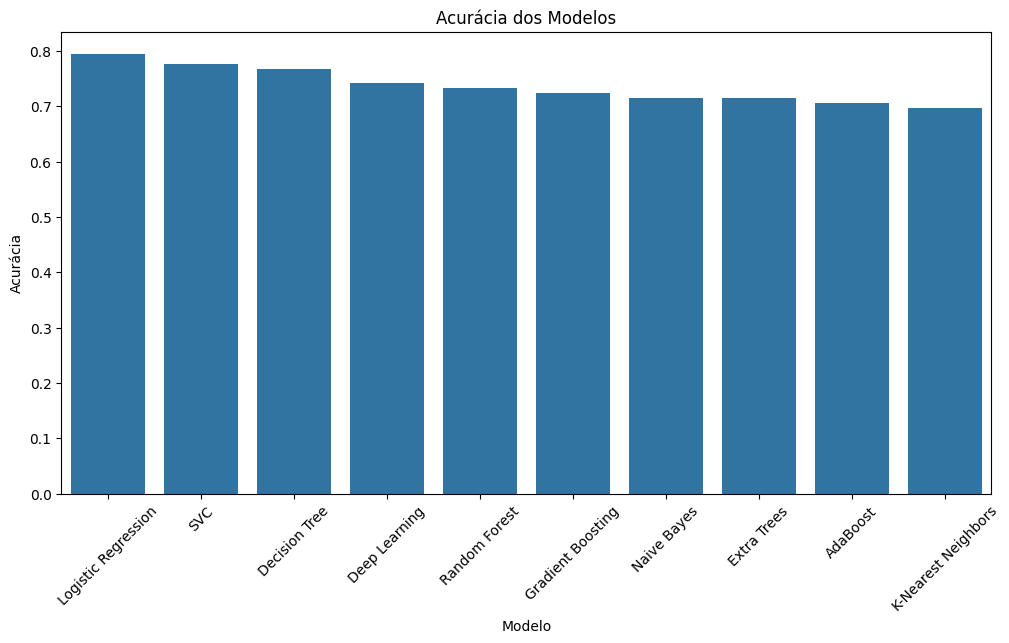

In [21]:
# Visualizando os resultados
plt.figure(figsize=(12, 6))
sns.barplot(x=resultados_df.index, y='Acurácia', data=resultados_df)
plt.title('Acurácia dos Modelos')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.xticks(rotation=45)
plt.show()


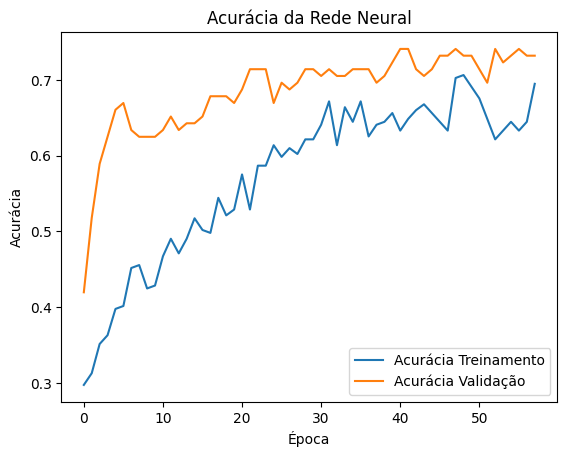

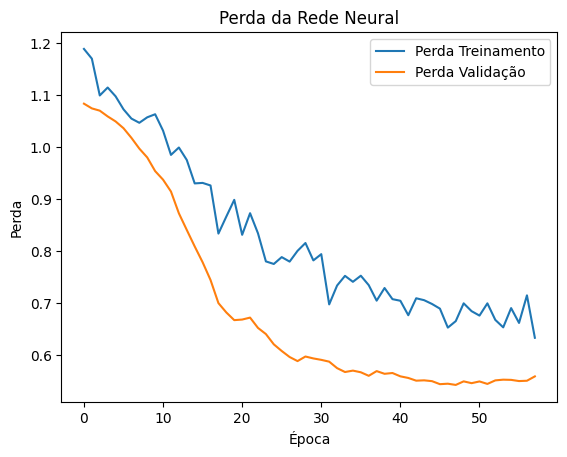

In [22]:
# Visualizando o desempenho da Rede Neural
plt.plot(hist.history['accuracy'], label='Acurácia Treinamento')
plt.plot(hist.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia da Rede Neural')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(hist.history['loss'], label='Perda Treinamento')
plt.plot(hist.history['val_loss'], label='Perda Validação')
plt.title('Perda da Rede Neural')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()


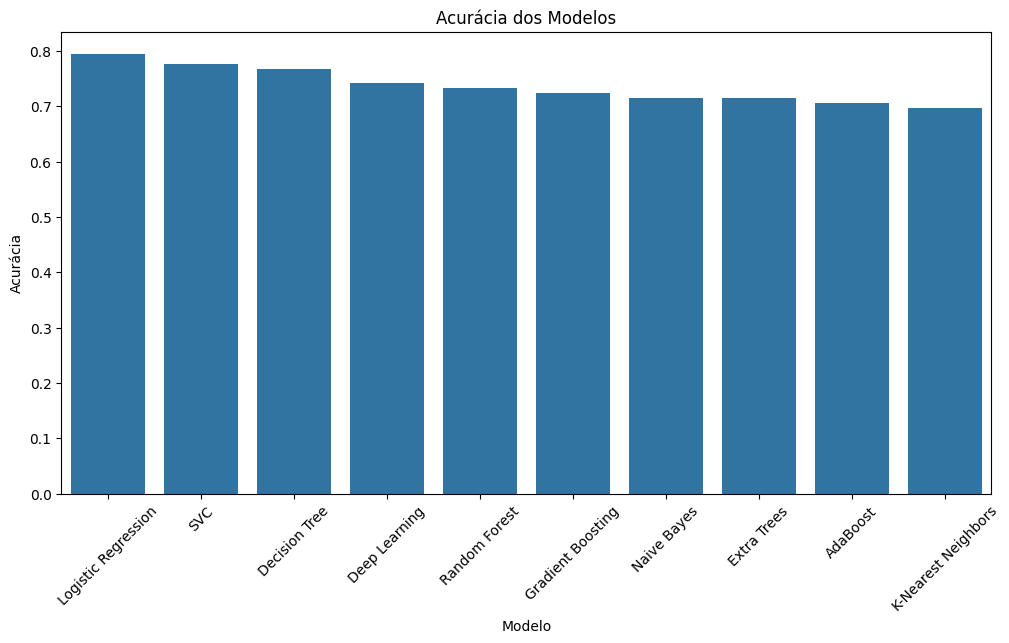

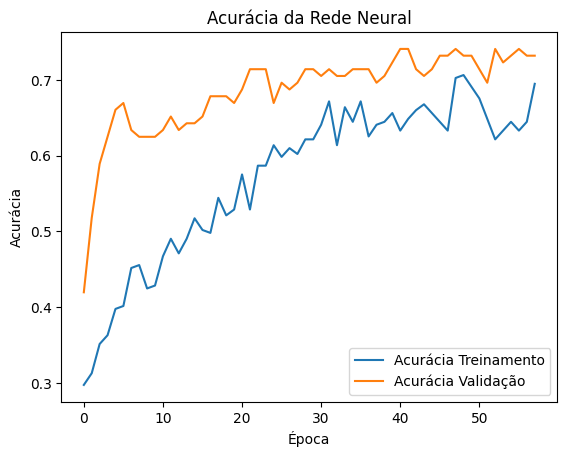

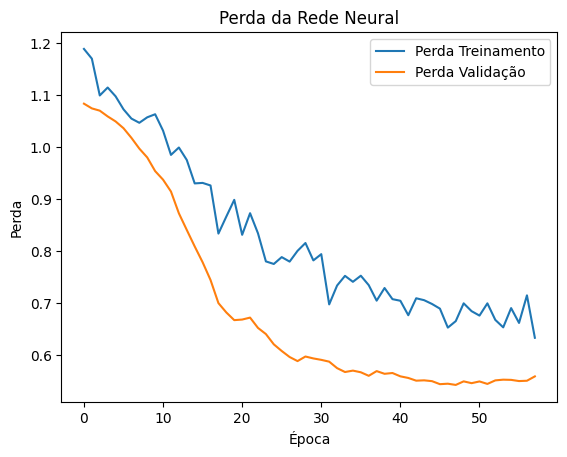

In [23]:
# Visualizando os resultados
plt.figure(figsize=(12, 6))
sns.barplot(x=resultados_df.index, y='Acurácia', data=resultados_df)
plt.title('Acurácia dos Modelos')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.xticks(rotation=45)
plt.show()

# Visualizando o desempenho da Rede Neural
plt.plot(hist.history['accuracy'], label='Acurácia Treinamento')
plt.plot(hist.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia da Rede Neural')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(hist.history['loss'], label='Perda Treinamento')
plt.plot(hist.history['val_loss'], label='Perda Validação')
plt.title('Perda da Rede Neural')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()



In [24]:
# Prevendo os tipos para o conjunto de teste usando o melhor modelo
melhor_modelo = LogisticRegression(max_iter=1000, random_state=99)
melhor_modelo.fit(X, y)
test_predictions = melhor_modelo.predict(test)

# Convertendo as previsões para as classes originais
test_predictions_labels = le.inverse_transform(test_predictions)

# Criando o DataFrame para submissão
submission_df = pd.DataFrame({
    'id': test_id,
    'type': test_predictions_labels
})

# Salvando o arquivo de submissão
submission_file_path = 'submission.csv'
submission_df.to_csv(submission_file_path, index=False)

print(f"Arquivo de submissão salvo como {submission_file_path}")


Arquivo de submissão salvo como submission.csv


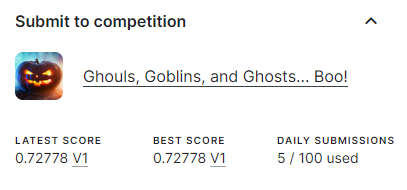